# Aplicación de redes neuronales a la predicción de Accidentes cardiovasculares

####Lina Maria Ferrer Rodriguez


---


### Problema a tratar:

* Un accidente cerebrovascular (ACV), también conocido como derrame cerebral, ocurre cuando el suministro de sangre a una parte del cerebro se interrumpe o disminuye, lo que priva a las células cerebrales de oxígeno y nutrientes. Según la Organización Mundial de la Salud (OMS), los derrames cerebrales constituyen una de las principales causas de discapacidad y muerte en el mundo. Por ello, es crucial detectar y prevenir a tiempo los factores de riesgo de ACV. Debido a la complejidad de dichos factores y sus interacciones se convierte en un desafío la identificación de personas en riesgo de sufrir ACV. La aplicación del aprendizaje profundo como método de predicción podría ayudar a la identificación de patrones complejos en los datos médicos y de esta forma contribuir a la detección temprana de riesgos de ACV.
### Selección del conjunto de datos:

El dataset seleccionado (Stroke Prediction Dataset) contiene información relevante sobre pacientes médicos y está diseñado para predecir la probabilidad de que un paciente sufra un accidente cerebrovascular.
Información sobre los atributos:

* id: identificador único
* gender: "Masculino", "Femenino" u "Otro"
* age: edad del paciente
* hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión
* heart_disease: 0 si el paciente no tiene enfermedades cardíacas, 1 si el paciente tiene una enfermedad cardíaca
* ever_married: "No" o "Sí"
* work_type: "Niños", "Empleado del Gobierno", "Nunca trabajado", "Privado" o "Autónomo"
* Residence_type: "Rural" o "Urbano"
* avg_glucose_level: nivel medio de glucosa en sangre
* bmi: índice de masa corporal
* smoking_status: "Anteriormente fumaba", "Nunca ha fumado", "Fuma" o "Desconocido"*
* stroke: 1 si el paciente ha tenido un accidente cerebrovascular o 0 si no

Nota: "Desconocido" en smoking_status significa que la información no está disponible para este paciente


In [ ]:
!wget  https://raw.githubusercontent.com/Melaan99/Stroke-Prediction/main/healthcare-dataset-stroke-data.csv

--2024-10-03 20:43:48--  https://raw.githubusercontent.com/Melaan99/Stroke-Prediction/main/healthcare-dataset-stroke-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316971 (310K) [text/plain]
Saving to: ‘healthcare-dataset-stroke-data.csv.2’

healthcare-dataset- 100%[===================>] 309.54K  --.-KB/s    in 0.04s   

2024-10-03 20:43:48 (7.01 MB/s) - ‘healthcare-dataset-stroke-data.csv.2’ saved [316971/316971]



In [ ]:
# librerias necesarias
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from tensorflow import keras

In [ ]:
# se carga el conjuntop de datos en un dataframe y se muestra la información de las primeras 5 filas
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
# se verifica la existencia de valores vacíos, se detectan 201 en la columna bmi ( índice de masa corporal)
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
# manejo de valores faltantes en bmi
mean_bmi = df['bmi'].mean()
std_bmi = df['bmi'].std()
missing_bmi = df['bmi'].isnull()
df.loc[missing_bmi, 'bmi'] = np.random.normal(loc=mean_bmi, scale=std_bmi, size=missing_bmi.sum())


In [ ]:
df['bmi'].isnull().sum()

0

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.906216,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854779,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,5.493435,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.600000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


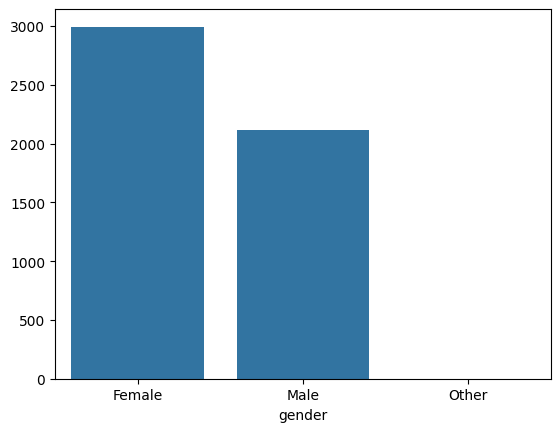

In [ ]:
sns.barplot(x=df.groupby('gender').count()['stroke'].index,y=df.groupby('gender').count()['stroke'].values)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


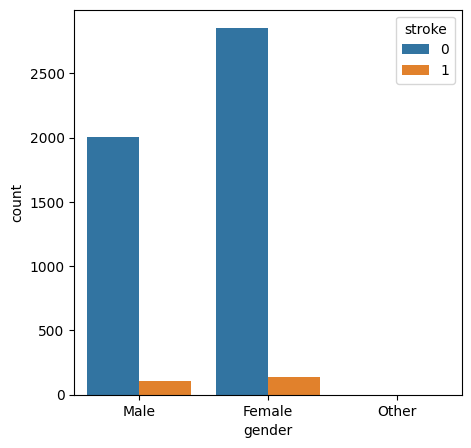

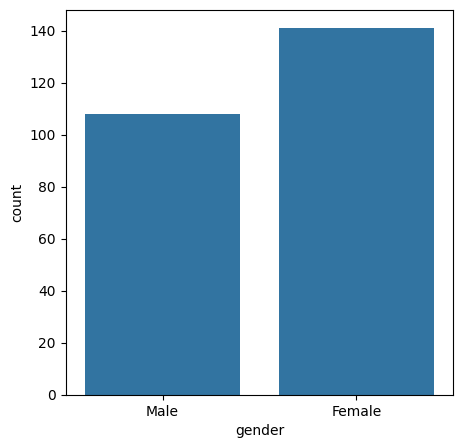

In [ ]:
# se muestra cómo afecta el genero a las probabilidades de tener ACV
plt.figure(figsize=(5,5))
sns.countplot(x='gender',hue='stroke',data=df)
plt.show()

plt.figure(figsize=(5,5))
sns.countplot(x='gender',data=df[df['stroke']==1])
plt.show()

In [ ]:
print(df['age'].max())

82.0


<ipython-input-21-5d5c9939bd98>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['stroke']==0].age,color='blue',kde=True,rug=True,label='No_stroke')
<ipython-input-21-5d5c9939bd98>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['stroke']==1].age,color='red',kde=True,rug=True,label=

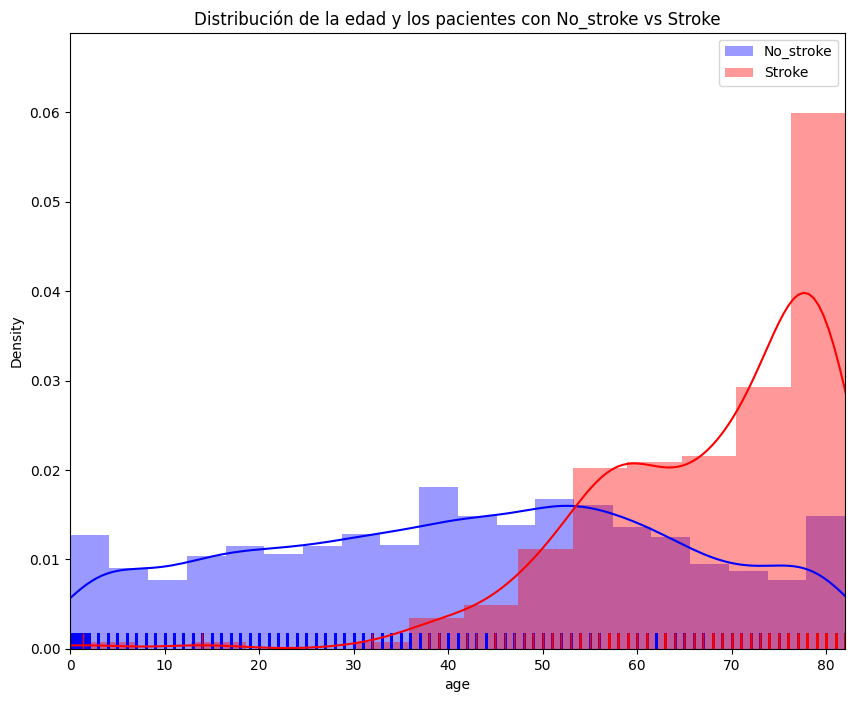

In [ ]:
# distribución de la edad y los pacientes con ACV
plt.figure(figsize=(10,8))
sns.color_palette('colorblind')
sns.distplot(df[df['stroke']==0].age,color='blue',kde=True,rug=True,label='No_stroke')
sns.distplot(df[df['stroke']==1].age,color='red',kde=True,rug=True,label='Stroke')
plt.title("Distribución de la edad y los pacientes con No_stroke vs Stroke")
plt.xlim([0,82])
plt.legend()
plt.show()

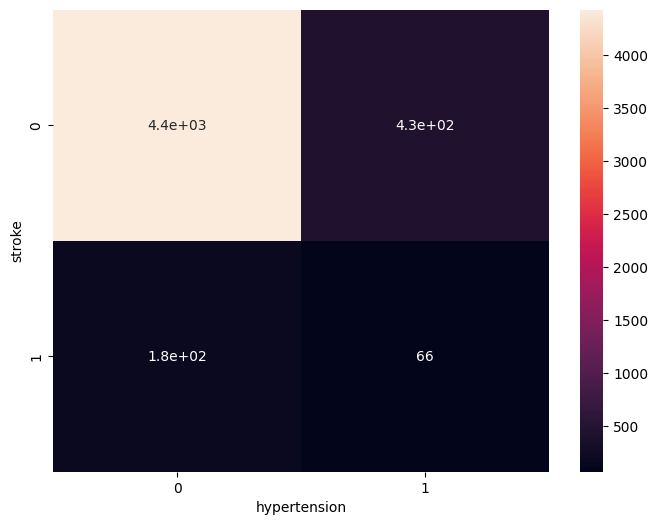

In [ ]:
# Relación entre ACV y la hipertensión
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df['stroke'],df['hypertension']),annot=pd.crosstab(df['stroke'],df['hypertension']))
plt.show()

In [ ]:
# tratamiento de variables categóricas
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_features = ['age', 'avg_glucose_level', 'bmi']

def preprocess_data(df, categorical_features, numerical_features):
    # codificación one-hot para características categóricas
    encoder = OneHotEncoder()
    X_cat = encoder.fit_transform(df[categorical_features])

    # escalado de características numéricas
    scaler = StandardScaler()
    X_num = scaler.fit_transform(df[numerical_features])

    # concatenar características codificadas y escaladas
    X = np.concatenate((X_cat.toarray(), X_num), axis=1)
    y = df['stroke'].values.reshape(-1, 1)

    return X, y

X, y = preprocess_data(df, categorical_features, numerical_features)

In [ ]:
# balanceo de clases con SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### Entrenamiento del modelo

In [ ]:
# División de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Capa de entrada (Input Layer): Tiene 64 neuronas (unidades) y utiliza la función de activación ReLU. La capa tiene una forma de entrada igual al número de características en los datos de entrenamiento (X_train.shape[1]).

Capa de abandono (Dropout Layer): Esta capa aplica la técnica de regularización de dropout con una tasa de dropout del 50%. Ayuda a prevenir el sobreajuste al desactivar aleatoriamente una fracción de las unidades de salida durante el entrenamiento.

Capa oculta (Hidden Layer): Esta es una capa oculta que sigue a la capa de abandono. Tiene 32 neuronas y también utiliza la función de activación ReLU.

Otra capa de abandono (Dropout Layer): : Se aplica otra capa de abandono con una tasa de dropout del 50% después de la segunda capa oculta.

Capa de salida (Output Layer): Tiene una sola neurona y utiliza la función de activación sigmoide que produce una salida en el rango de 0 a 1, que se interpreta como la probabilidad de que un paciente tenga un accidente cerebrovascular.

In [ ]:
# Construcción del modelo MLP
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6155 - loss: 0.6437 - val_accuracy: 0.7892 - val_loss: 0.4688
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7348 - loss: 0.5244 - val_accuracy: 0.7988 - val_loss: 0.4382
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7786 - loss: 0.4806 - val_accuracy: 0.8014 - val_loss: 0.4295
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7873 - loss: 0.4614 - val_accuracy: 0.8059 - val_loss: 0.4241
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7826 - loss: 0.4685 - val_accuracy: 0.8066 - val_loss: 0.4193
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7926 - loss: 0.4550 - val_accuracy: 0.8111 - val_loss: 0.4171
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7973 - loss: 0.4537 - val_accuracy: 0.8111 - val_loss: 0.4133
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8034 - loss: 0.4448 - val_accuracy: 0.8123 - val_loss:

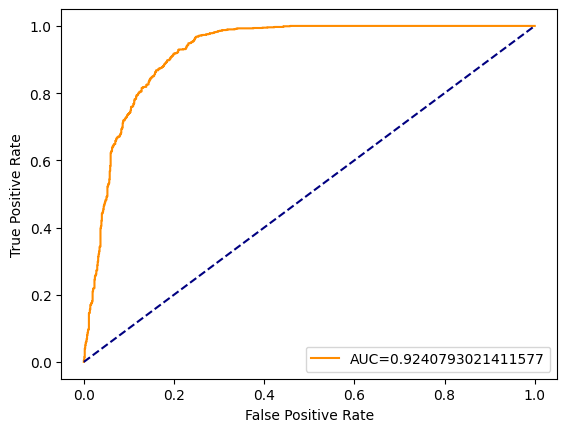

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,949 (42.77 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,300 (28.52 KB)

In [ ]:

# compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# evaluación del modelo en el conjunto de prueba
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# mostrar métricas de evaluación
print(classification_report(y_test, y_pred))

# calcular y mostrar el AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC=" + str(auc), color='darkorange')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# resumen del modelo
model.summary()